# Supervised Learning (Classification)

## The purpose of this is to explore how to use different classification algorithms and learn the R syntax for these different methods

# Decision Tree Classification

In [2]:
# I got this dataset from UCI Repository to classify if the person has heart disease or not (0 or 1)
df <- read.csv("heartclass.csv")

In [3]:
# here we check the look of the data
head(df)

ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [4]:
# lets change back the age column to age
colnames(df)[1] <- "age" # change column name

In [6]:
# Lets see the dimension and structure of this dataset
dim(df)
summary(df)
str(df)

[1] 303  14

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


In [7]:
# lets change the target column to a factor for prediction!
df$target <- as.factor(df$target)

In [8]:
# Determine the number of rows for training
nrow(df) * 0.75

# Create a random sample of row IDs
sample_rows <- sample(nrow(df), nrow(df) * 0.75)

# Create the training dataset
df_train <- df[sample_rows, ]

# Create the test dataset
df_test <- df[-sample_rows, ]

# Removing missing values
df_train <- na.omit(df_train)
df_test <- na.omit(df_test)

[1] 227.25

In [9]:
# Importing packages for decision tree classification 
library(rpart) # decision tree library
library(caret) # machine learning library
install.packages("rpart.plot")
library(rpart.plot)

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpKUc8Bh\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.6.2"

In [10]:
#prepruning the tree
preprune <- rpart.control(maxdepth = 6, cp= 0) 

# Here we predict the target using all the columns max dept =6 and cp =0
treefit <- rpart(target ~ . ,data=df_train, method = "class", control = preprune) # Predicting if i will have bad day or not

print(treefit)

n= 227 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 227 102 1 (0.4493392 0.5506608)  
   2) thal>=2.5 88  20 0 (0.7727273 0.2272727)  
     4) cp< 0.5 59   6 0 (0.8983051 0.1016949) *
     5) cp>=0.5 29  14 0 (0.5172414 0.4827586)  
      10) thalach< 150.5 11   2 0 (0.8181818 0.1818182) *
      11) thalach>=150.5 18   6 1 (0.3333333 0.6666667) *
   3) thal< 2.5 139  34 1 (0.2446043 0.7553957)  
     6) exang>=0.5 31  12 0 (0.6129032 0.3870968)  
      12) cp< 0.5 20   3 0 (0.8500000 0.1500000) *
      13) cp>=0.5 11   2 1 (0.1818182 0.8181818) *
     7) exang< 0.5 108  15 1 (0.1388889 0.8611111) *


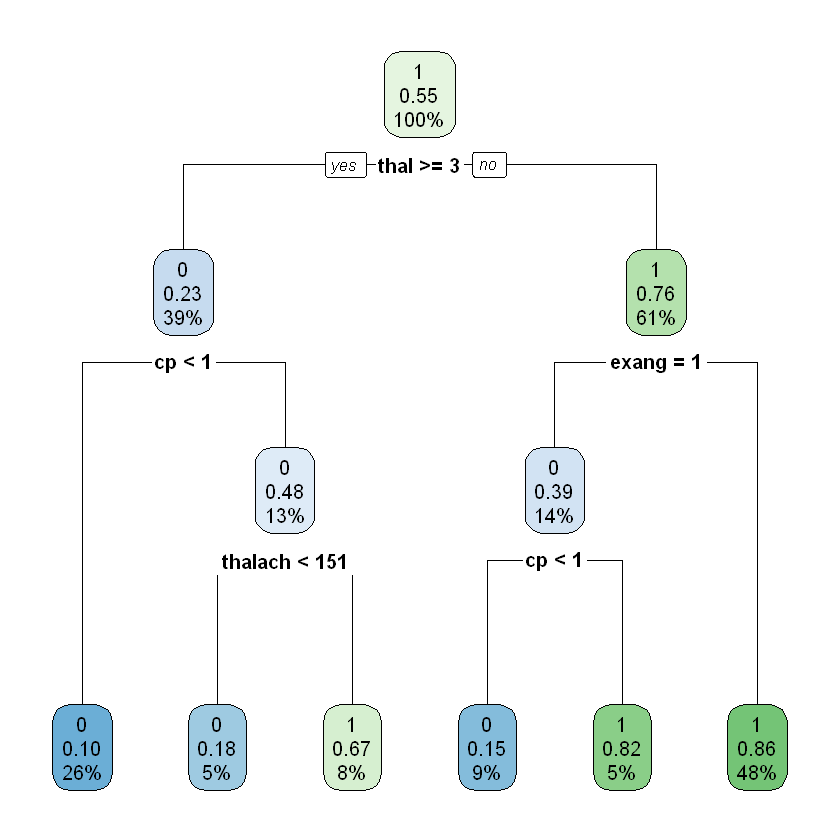

In [11]:
# PLOTTING THE TREE
rpart.plot(treefit)

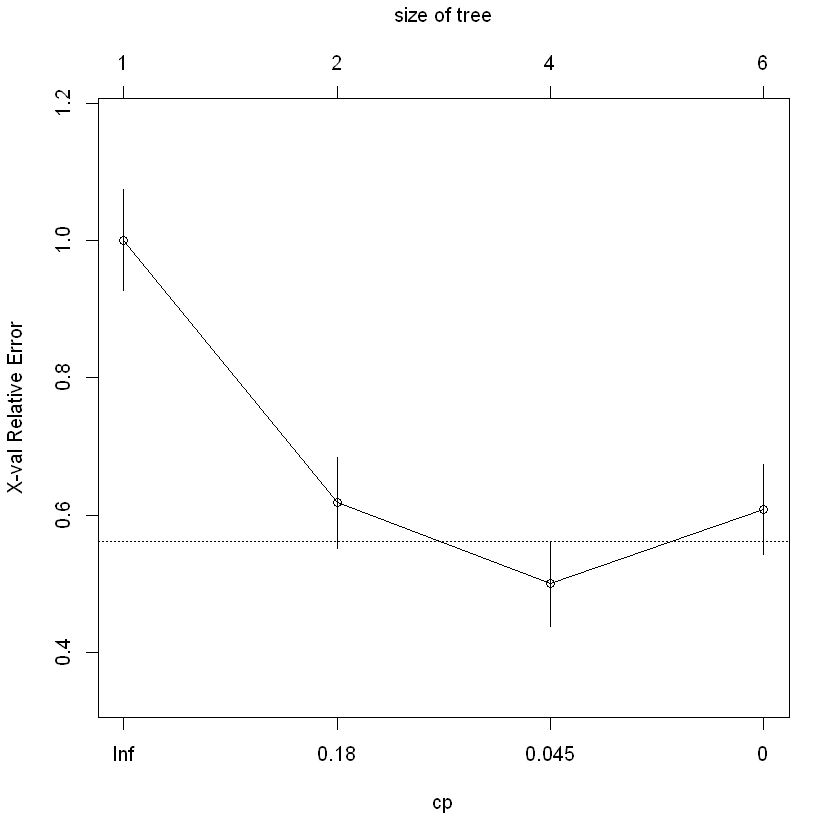

In [12]:
# Here we want to make sure the model isnt overly complex so we will use plotcp
plotcp(treefit) # visualization of error rate vs model complexity 


In [13]:
# Lets prune the tree at .18 cp
prunedtreefit <- prune(treefit, cp = 0.18) 

In [14]:
# PRUNED TREE PREDICITON 
df_test$prediction <- predict(prunedtreefit,newdata = df_test, type = "class") # what does type class mean


In [15]:
# Examine the confusion matrix
table(df_test$prediction, df_test$target)

   
     0  1
  0 21  8
  1 15 32

In [16]:
# Lets make it more understandable 
# Another method of prediciton!
confusionMatrix(df_test$prediction, df_test$target)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  8
         1 15 32
                                          
               Accuracy : 0.6974          
                 95% CI : (0.5813, 0.7975)
    No Information Rate : 0.5263          
    P-Value [Acc > NIR] : 0.0018          
                                          
                  Kappa : 0.3871          
                                          
 Mcnemar's Test P-Value : 0.2109          
                                          
            Sensitivity : 0.5833          
            Specificity : 0.8000          
         Pos Pred Value : 0.7241          
         Neg Pred Value : 0.6809          
             Prevalence : 0.4737          
         Detection Rate : 0.2763          
   Detection Prevalence : 0.3816          
      Balanced Accuracy : 0.6917          
                                          
       'Positive' Class : 0               
                                    

In [17]:
# Compute the accuracy on the test dataset
mean(df_test$prediction == df_test$target)

[1] 0.6973684

In [18]:
# Lets upload a new sample that hasnt been used for prediction see how this model works

pred_df <- read.csv("pred_df.csv") # import 

colnames(pred_df)[1] <- "age" # change column name back to age

pred_df$target <- as.factor(pred_df$target)

In [19]:
#Decision Tree
pred_df$predict <- predict(prunedtreefit,newdata = pred_df, type = "class") # make new prediction column

In [22]:
confusionMatrix(pred_df$predict, pred_df$target) # 54% accuracy is not great!!
# For now lets see how the syntax and structure of other algorithms look like

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 0 0
         1 3 4
                                         
               Accuracy : 0.5714         
                 95% CI : (0.1841, 0.901)
    No Information Rate : 0.5714         
    P-Value [Acc > NIR] : 0.6531         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 0.2482         
                                         
            Sensitivity : 0.0000         
            Specificity : 1.0000         
         Pos Pred Value :    NaN         
         Neg Pred Value : 0.5714         
             Prevalence : 0.4286         
         Detection Rate : 0.0000         
   Detection Prevalence : 0.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
                                         

# KNN ALGORITHM 

In [23]:
# installing needed packages
install.packages("class")
library(class)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'class' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'class'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\class\libs\x64\class.dll to C:\Users\blake\Documents\R\win-library\3.6\class\libs\x64\class.dll: Permission denied"Warning message:
"restored 'class'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpKUc8Bh\downloaded_packages


Warning message:
"package 'class' was built under R version 3.6.2"

# Here we will observe normalized prediction vs not (not first)

In [24]:
# WITHOUT NORMALIZATION PREDICTION
# Determine the number of rows for training
nrow(df) * 0.75

# Create a random sample of row IDs
sample_rows <- sample(nrow(df), nrow(df) * 0.75)

# Create the training dataset
KNN_train <- df[sample_rows, ]

# Create the test dataset
KNN_test <- df[-sample_rows, ]

# Declaring a column of vector labels 
health_status <- KNN_train$target

#OMIT NA VALUES 
KNN_train <- na.omit(KNN_train)
KNN_test <- na.omit(KNN_test)

[1] 227.25

In [25]:
# KNN MODEL with K value = 1 (default value)
health_pred <- knn(train = KNN_train[-14], test = KNN_test[-14], cl = health_status)


In [26]:
# Vector of actual test vector for comparison in Confusion matrix of predicted vs actual 
health_actual <- KNN_test$target

In [28]:
# Confusion matrix
table(health_pred, health_actual) # Confusion matrix

# Compute the accuracy
mean(health_pred == health_actual) # 72% accuracy  

           health_actual
health_pred  0  1
          0 26 10
          1 11 29

[1] 0.7236842

In [31]:
# NOW PREDICTING WITH DIFFERENT VALUES OF K (this one K = 5)
health_pred_K5 <- knn(train = KNN_train[-14], test = KNN_test[-14], cl = health_status, k = 5)
#computing accuarcy again # this time it is 67%
mean(health_actual == health_pred_K5)

# Use the prob parameter to get the proportion of votes for the winning class
health_pred_prob <- knn(train = KNN_train[-14], test = KNN_test[-14], cl = health_status, k = 5, prob = TRUE)
 
# 71% accuracy model is not as good 

# Get the "prob" attribute from the predicted classes
health_prob <- attr(health_pred_prob, "prob")

# Examine the first several predictions
head(health_pred_prob)

# Examine the proportion of votes for the winning class
head(health_prob)

[1] 0.7105263

[1] 1 1 1 1 1 1
Levels: 0 1

[1] 1.0 0.8 0.8 0.8 0.8 0.8

# With Normalization

In [34]:
# Taking random sample 
ran = sample(1:nrow(df), 0.8 * nrow(df))

# Normalize function
nor <- function(x){
  (x- min(x))/(max(x)-min(x))
}

# make new normalized dataframe 
df_nor <- as.data.frame(lapply(df[,1:13],nor))

# Create the training dataset
KNN_train_nor <- df_nor[ran, ]

# Create the test dataset
KNN_test_nor <- df_nor[-ran, ]

# Declaring a column of vector labels 
health_target_nor <- df[ran,14] # target column not included in orignal dataframe 

# Test vector category
health_test_nor <- df[-ran,14]

In [36]:
# KNN MODEL with K value = 5  this time normalized
health_pred_nor <- knn(train = KNN_train_nor, test = KNN_test_nor, cl = health_target_nor,k=5)

#Confusion matrix!

table(health_pred_nor, health_test_nor) # Confusion matrix

# Compute the accuracy
mean(health_pred_nor == health_test_nor) # 75% accuracy this time!!!! much better!

# There is better accuracy then the previous non-normalized model !

               health_test_nor
health_pred_nor  0  1
              0 19  5
              1 10 27

[1] 0.7540984

# NAIVE BAYES CLASSIFICATION

In [37]:
# Installing proper packages
install.packages("naivebayes")
library(naivebayes)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'naivebayes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpKUc8Bh\downloaded_packages


Warning message:
"package 'naivebayes' was built under R version 3.6.2"naivebayes 0.9.6 loaded


In [39]:
# Exploring the probabilities of this dataset

# Probabilities first
p_A <- nrow(subset(df, sex == 1))/ nrow(df) # 68% are male

p_B <- nrow(subset(df, chol >= 225)) / nrow(df) # probability of super high cholesterol 

# probability of them together 
p_AB <- nrow(subset(df, sex == 0 & chol >= 225)) / nrow(df) # only 22%

# Probability of A or B
# probability of having high cholesterol given that hes male
p_A_given_B <- p_AB / p_B
p_A_given_B

[1] 0.3418367

In [40]:
# Repeating how to make sample data!
# Determine the number of rows for training
nrow(df) * 0.75

# Create a random sample of row IDs
sample_rows <- sample(nrow(df), nrow(df) * 0.75)

# Create the training dataset
df_train <- df[sample_rows, ]

# Create the test dataset
df_test <- df[-sample_rows, ]


df_train <- na.omit(df_train)
df_test <- na.omit(df_test)

# COLUMN OF TARGET 
# Test vector category
naive_actual <- df[-sample_rows,14]


[1] 227.25

In [41]:
# USE ALL THE PREDICTORS IN THIS MODEL
naive_model <- naive_bayes(target ~. , data = df_train)


# take a look at the predicted values 
naive_pred <- predict(naive_model,df_test[-14]) 

# take a look at the predicted values 
df_test$naive_pred <- predict(naive_model,df_test[-14]) # predicting values for test set 

#making probabilities of even happening
df_test$prob <-predict(naive_model,df_test[-14], type = "prob") # predicting the probabilities


#Because the more complicated the model the algorithm assumes the calculations of complex models being independent events so here we will change laplace calculation
#Changing laplace calculation!
df_test$naive_pred_2 <- predict(naive_model,df_test[-14],laplace = 1,)

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

In [42]:
#Confusion matrix!

table(naive_pred, naive_actual) # Confusion matrix

# Compute the accuracy
mean(naive_pred == naive_actual) # 80% accuracy this time!!!! much better!


          naive_actual
naive_pred  0  1
         0 27 10
         1  5 34

[1] 0.8026316

# LOGISTIC REGRESSION

In [44]:
# Rerunning the sample for copy and paste purposes later on!
nrow(df) * 0.75

# Create a random sample of row IDs
sample_rows <- sample(nrow(df), nrow(df) * 0.75)

# Create the training dataset
df_train <- df[sample_rows, ]

# Create the test dataset
df_test <- df[-sample_rows, ]


df_train <- na.omit(df_train)
df_test <- na.omit(df_test)

# Make test df vector for confusion matrix 
# Test vector category
logistic_actual <- df[-sample_rows,14]


[1] 227.25

In [47]:
# logistic regression 
glm_model <- glm(target ~. , data = df_train, family = "binomial")
summary(glm_model) # estimates show positive relationship with age, fbs, thalach and cp

# this gives a column of predicted probabilities
glm_pred <- predict(glm_model,df_test, type = "response")

df_test$glm_pred <- predict(glm_model,df_test, type = "response")

# find the average target probability of having health problems
mean(df_test$target) # it is binary here 

# make the predictions binary!!!!!!!!!
df_test$target_pred <- ifelse(df_test$glm_pred > 0.504, 1, 0)

# Calculate the model's accuracy
mean(logistic_actual == df_test$target_pred) # 80% accurate!


Call:
glm(formula = target ~ ., family = "binomial", data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6035  -0.2919   0.1762   0.5278   2.4728  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.990808   3.062808   0.976 0.328821    
age         -0.015293   0.027234  -0.562 0.574423    
sex         -1.921233   0.576492  -3.333 0.000860 ***
cp           0.803713   0.224998   3.572 0.000354 ***
trestbps    -0.025408   0.012427  -2.044 0.040907 *  
chol        -0.003285   0.004635  -0.709 0.478455    
fbs          0.817572   0.691083   1.183 0.236798    
restecg      0.467842   0.429296   1.090 0.275805    
thalach      0.032850   0.013328   2.465 0.013714 *  
exang       -1.255962   0.503351  -2.495 0.012589 *  
oldpeak     -0.424519   0.265804  -1.597 0.110241    
slope        0.573574   0.429965   1.334 0.182203    
ca          -0.798743   0.227567  -3.510 0.000448 ***
thal        -0.834618   0.368975  -2.262 0.0

Warning message in mean.default(df_test$target):
"argument is not numeric or logical: returning NA"

[1] NA

[1] 0.8026316

# Model Performance

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'pROC' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pROC'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\pROC\libs\x64\pROC.dll to C:\Users\blake\Documents\R\win-library\3.6\pROC\libs\x64\pROC.dll: Permission denied"Warning message:
"restored 'pROC'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\RtmpKUc8Bh\downloaded_packages


Warning message:
"package 'pROC' was built under R version 3.6.2"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8908

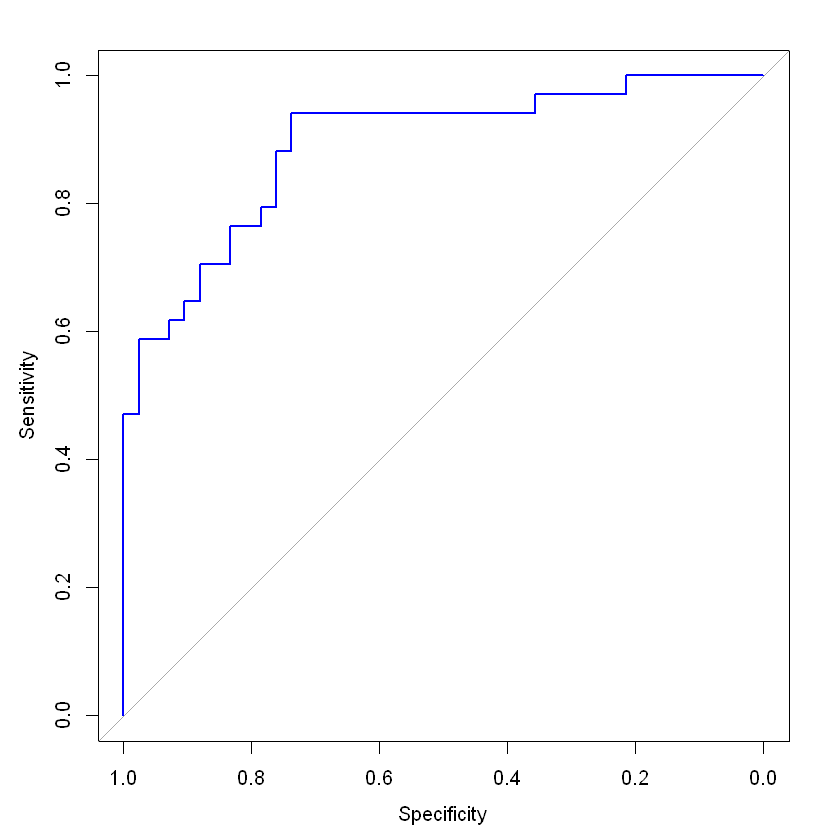

In [48]:
# lets see the models performance with ROC 
# This tests the ability of test to correctly identify those with disease(true postive or sensitivity), 
#   where specificity is the ability to test correctly identify those without disease (true negative rate)
# Load the pROC package
install.packages("pROC")
library(pROC)

# Create a ROC curve
ROC <- roc(logistic_actual, df_test$glm_pred)

# Plot the ROC curve
plot(ROC, col = "blue")

# Calculate the area under the curve (AUC)
auc(ROC) # ROC is .9347

In [49]:
# Decent! Now lets do bonus round of learning!

# Stepwise Regression (automatic feature selection)

In [51]:
# Stepwise Regression for predictor 
# Specify a null model with no predictors
null_model <- glm(target ~ 1, data = df_train, family = "binomial")

# Specify the full model using all of the potential predictors
full_model <- glm(target ~ ., data = df_train, family = "binomial")

# Use a forward stepwise algorithm to build a parsimonious model
step_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")

# Estimate the stepwise donation probability
step_prob <- predict(step_model, type = "response")



Start:  AIC=311.27
target ~ 1

           Df Deviance    AIC
+ thalach   1   259.27 263.27
+ oldpeak   1   260.09 264.09
+ exang     1   263.78 267.78
+ cp        1   268.62 272.62
+ ca        1   275.71 279.71
+ thal      1   276.76 280.76
+ slope     1   277.67 281.67
+ sex       1   288.25 292.25
+ age       1   293.88 297.88
+ trestbps  1   300.35 304.35
+ restecg   1   303.35 307.35
<none>          309.27 311.27
+ chol      1   309.18 313.18
+ fbs       1   309.26 313.26

Step:  AIC=263.27
target ~ thalach

           Df Deviance    AIC
+ thal      1   233.39 239.39
+ cp        1   235.18 241.18
+ sex       1   235.73 241.73
+ exang     1   235.75 241.75
+ ca        1   237.19 243.19
+ oldpeak   1   237.46 243.46
+ slope     1   248.48 254.48
+ trestbps  1   252.00 258.00
+ restecg   1   253.98 259.98
+ age       1   257.14 263.14
<none>          259.27 263.27
+ chol      1   258.67 264.67
+ fbs       1   258.86 264.86

Step:  AIC=239.39
target ~ thalach + thal

           Df Devi

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.9221

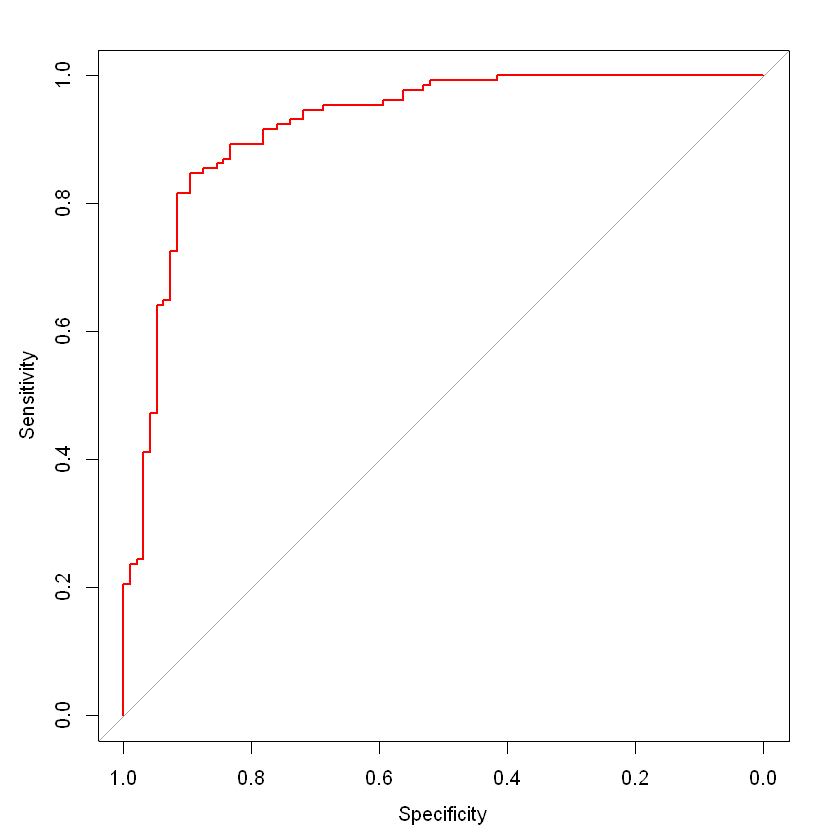

In [52]:
# Plot the ROC of the stepwise model

library(pROC)
ROC <- roc(df_train$target, step_prob)
plot(ROC, col = "red")
auc(ROC)


# Better !!! The purpose of this script for me was to learn the syntax and structure of these different algorithms not the mathmatical background! Hopefully this helps you like it helped me!